In [1]:
import pandas as  pd
import numpy as np
import tqdm

# 数据读取
data = pd.read_csv("D:\学习资料\计算机\研一下\数据挖掘\\new.csv", low_memory=False)

In [2]:
### 数据摘要
# 分析属性数据类型
print(data.shape)
print(data.dtypes)
pd.set_option('display.max_columns', 26)
data.head(5)

(318851, 26)
url                     object
id                      object
Lng                    float64
Lat                    float64
Cid                      int64
tradeTime               object
DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
floor                   object
buildingType           float64
constructionTime        object
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,�� 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,�� 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,�� 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,�� 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,�� 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


### 分析
根据官方数据集的介绍和对数据集部分列的分析，能够看出各个属性的物理意义和数据类型，该数据集包含318851条数据，每个数据包含26个属性，分别是：

|属性|含义|
|:--|:--|
|url| 房屋信息网址
|id| 交易编号
|Lng| 经度
|Lat| 纬度
|Cid| 小区编号
|tradeTime| 成交时间
|DOM| 上架时间-从委托出售到成交的时间
|followers| 关注人数
|totalPrice| 成交总价
|price| 成交单价
|square| 面积
|livingRoom| 卧室数量
|drawingRoom| 客厅数量
|kitchen| 厨房数量
|bathRoom| 卫生间数
|floor| 所在楼层
|buildingType| 建筑类型，包括塔楼，平房，板塔结合，板楼 
|constructionTime| 建造时间
|renovationCondition| 装修情况，包括其他，毛坯，简装，精装
|buildingStructure| 建筑结构类型，包括不确定，混合，砖木，砖混，钢
|ladderRatio| 户梯比例，电梯数量除以住户数量
|elevator| 有无电梯
|fiveYearsProperty| 是否满五年
|subway| 是否地铁沿线
|district| 所在行政区
|communityAverage| 所在小区均价

In [3]:
# # 根据各属性的含义和取值，将部分属性列的数值类型更换至数值类型，以便后续的回归预测

# 以下属性可直接更改
data["livingRoom"] = data["livingRoom"].apply(pd.to_numeric, errors='coerce')
data["drawingRoom"] = data["drawingRoom"].apply(pd.to_numeric, errors='coerce')
data["bathRoom"] = data["bathRoom"].apply(pd.to_numeric, errors='coerce')

# floor属性本身包含所属楼类型（高、中、低），这里删去类型，只保留层数
for i in tqdm.tqdm(range(data.shape[0])):
    if ~pd.isna(data['floor'][i]):
        data['floor'][i] = data['floor'][i][3:]
data["floor"] = data["floor"].apply(pd.to_numeric, errors='coerce')

# tradTime属性格式为year-month-day，不方便分析，这里将该属性分成三个不同的数值属性tradeYear、tradeMonth、tradeDay，并删除原属性
data['tradeYear'] = data['tradeTime'].astype('datetime64[ns]').astype(str).str[0:4].astype('int64')
data['tradeMonth'] = data['tradeTime'].astype('datetime64[ns]').astype(str).str[5:7].astype('int64')
data['tradeDay'] = data['tradeTime'].astype('datetime64[ns]').astype(str).str[8:].astype('int64')
data = data.drop('tradeTime', axis = 1)

# 查看缺失值个数
data.isnull().sum().sort_values()

  0%|                                                                                                                                                                           | 0/318851 [00:00<?, ?it/s]D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 318851/318851 [06:31<00:00, 813.60it/s]


url                         0
tradeYear                   0
district                    0
ladderRatio                 0
buildingStructure           0
renovationCondition         0
constructionTime            0
tradeMonth                  0
kitchen                     0
tradeDay                    0
Cid                         0
id                          0
price                       0
totalPrice                  0
Lng                         0
Lat                         0
followers                   0
square                      0
bathRoom                    2
elevator                   32
fiveYearsProperty          32
subway                     32
floor                      32
drawingRoom                32
livingRoom                 32
communityAverage          463
buildingType             2021
DOM                    157977
dtype: int64

### 分析
可以看到，共有10个数值属性存在缺失值，其中DOM、buildingType和communityAverage缺失值相对较多，其他属性缺失值相对较少，为了保证回归时的训练数据量充足，考虑对缺失值过多的属性进行填补

In [4]:
# 考虑到buildingType为离散的数值属性，使用众数填补缺失值
data['buildingType'] = data['buildingType'].fillna(data['buildingType'].mode().iloc[0])

# 考虑到DOM和communityAverage属性均为跨度很大的浮点数，使用均值填补缺失值
data['communityAverage'].fillna(data['communityAverage'].dropna().mean(0), inplace=True)
data['DOM'].fillna(data['DOM'].dropna().mean(0), inplace=True)

# 对于缺失值极少的属性，直接删除所在行数据，由于这些缺失数据量和整体数据之前相差4个数量级，所以基本不会影响最终的回归效果
cols1 = data.shape[0]
process_col = ["bathRoom","elevator","fiveYearsProperty","subway","floor","drawingRoom","livingRoom"]
data= data.dropna(axis=0,subset = process_col)
cols2 = data.shape[0]
print("删除数据量："+str(cols2-cols1))

# 验证缺失值已处理完毕
data.isna().sum().sort_values()

删除数据量：-32


url                    0
tradeYear              0
communityAverage       0
district               0
subway                 0
fiveYearsProperty      0
elevator               0
ladderRatio            0
buildingStructure      0
renovationCondition    0
constructionTime       0
buildingType           0
floor                  0
bathRoom               0
kitchen                0
drawingRoom            0
livingRoom             0
square                 0
price                  0
totalPrice             0
followers              0
DOM                    0
Cid                    0
Lat                    0
Lng                    0
id                     0
tradeMonth             0
tradeDay               0
dtype: int64

array([[<AxesSubplot:title={'center':'totalPrice'}>]], dtype=object)

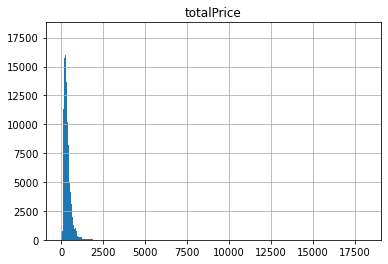

In [5]:
# 数据可视化

# 总价直方图
data.hist("totalPrice", bins=1000)

<AxesSubplot:>

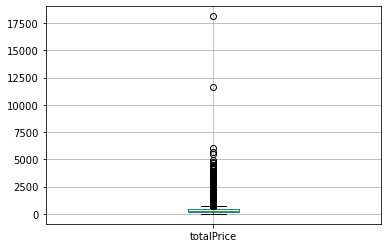

In [6]:
# 总价盒图
data.boxplot("totalPrice")

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

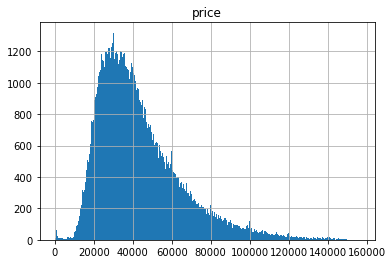

In [7]:
# 单价直方图
data.hist("price", bins = 1000)

<AxesSubplot:>

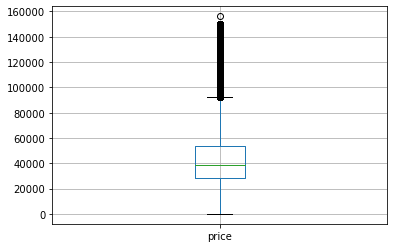

In [8]:
# 单价盒图
data.boxplot("price")

### 分析
通过总价和单价的直方图和盒图可以看出，成交房屋总价均值在500w左右，成交单价在每平米3w5左右，单价在10w以上的成交量相对较少

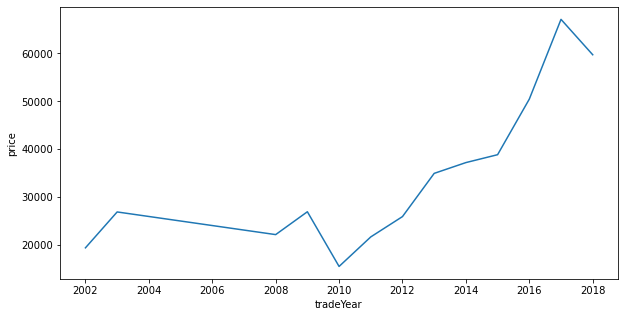

In [10]:
# 房屋单价与年份的关系
import matplotlib.pyplot as plt

x = data["tradeYear"].value_counts()._stat_axis.values.tolist()
x = sorted(x)
y = []
for i in x:
    y.append(data['price'][data['tradeYear']== i].mean(0))
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xlabel("tradeYear")
plt.ylabel("price")
plt.show()

### 分析
由单价-时间的折线图不难看出，房屋单价波动上升，在2012年以后飞速上涨，但2018年反而有所下降，结合历史原因，可能是2018年政府出台的房屋限购政策的影响。

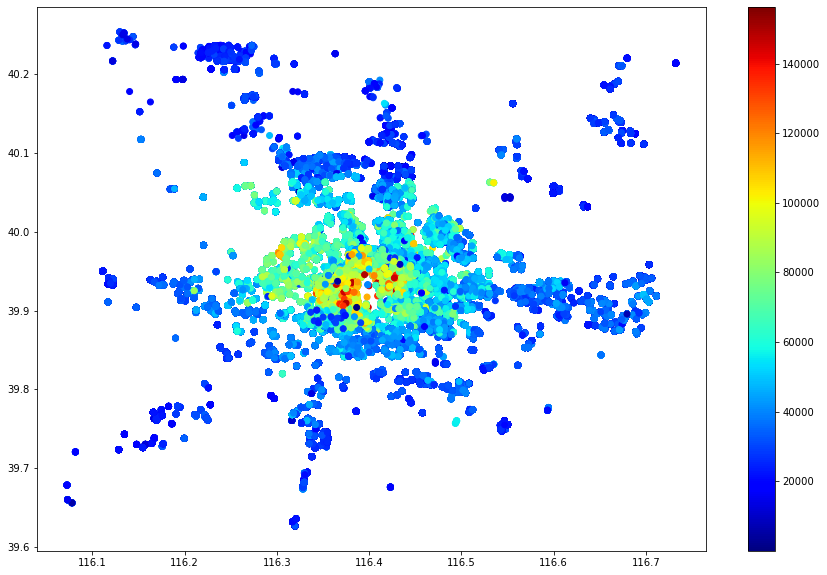

In [11]:
# 房屋单价与位置的关系

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
fig = plt.scatter(x=data['Lng'], y=data['Lat'], c=data['price'], cmap=plt.get_cmap('jet'))
plt.colorbar(fig)


### 分析
由单价-地理位置热力图看到，越靠近内环的房屋单价越高，且成交量也越高。

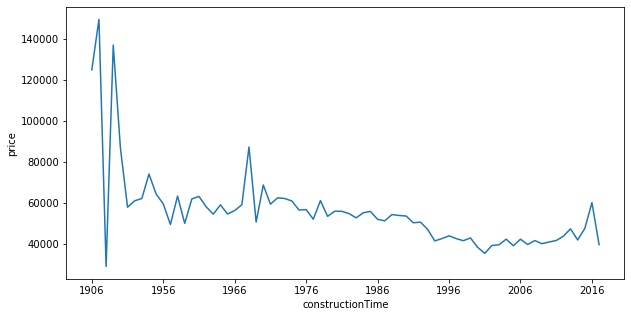

In [12]:
#  房屋单价和房屋建造时间的关系
from matplotlib import ticker
x = data["constructionTime"].value_counts()._stat_axis.values.tolist()
x = sorted(x)
y = []
for i in x:
    y.append(data['price'][data['constructionTime']== i].mean(0))
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xlabel("constructionTime")
plt.ylabel("price")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

### 分析
由单价-房屋建造时间可以看到，老房子和新房子单价相差不多，甚至越老的房屋单价越高，推测建国前的房屋大多数应该为天安门城楼旁边的四合院，单价很高也算合理。

array([[<AxesSubplot:title={'center':'square'}>]], dtype=object)

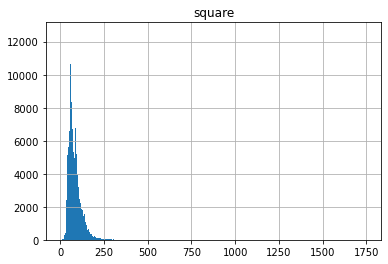

In [13]:
# 房屋总价与面积的关系

# 面积直方图
data.hist("square", bins=1000)

<AxesSubplot:>

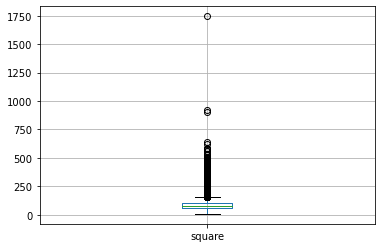

In [14]:
# 面积盒图
data.boxplot("square")

### 分析
由房屋面积的直方图和盒图可以看出，北京市成交的房屋大多数在100平米左右，少量房屋在200平米以上，极少数房屋面积达到了800平米

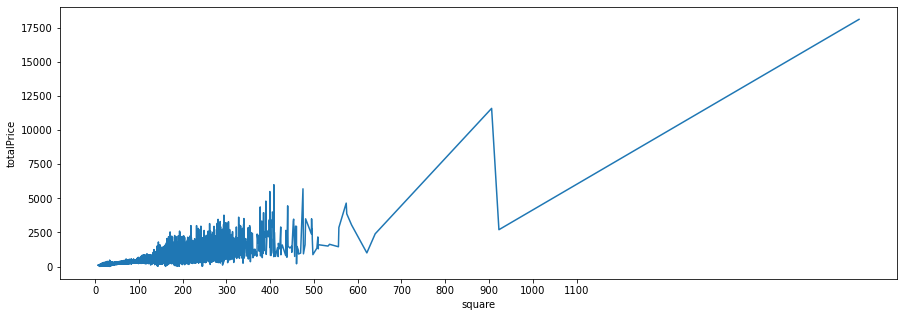

In [15]:
# 房屋总价和面积的关系
from matplotlib import ticker
x = data["square"].value_counts()._stat_axis.values.tolist()
x = sorted(x)
y = []
for i in x:
    y.append(data['totalPrice'][data['square']== i].mean(0))
plt.figure(figsize=(15, 5))
plt.plot(x, y)
plt.xticks(np.arange(0, 1200, step=100))
plt.xlabel("square")
plt.ylabel("totalPrice")
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

### 分析
由房屋总价-面积的关系基本可知，房屋总价和房屋面积大小呈正相关关系，这是符合常识的，但是在相同面积时，房屋总售价仍存在不小的波动，具体表现为折线图在横坐标100平米至400平米处密度、纵跨度较大，可见房屋总价同时受其它强相关因素影响

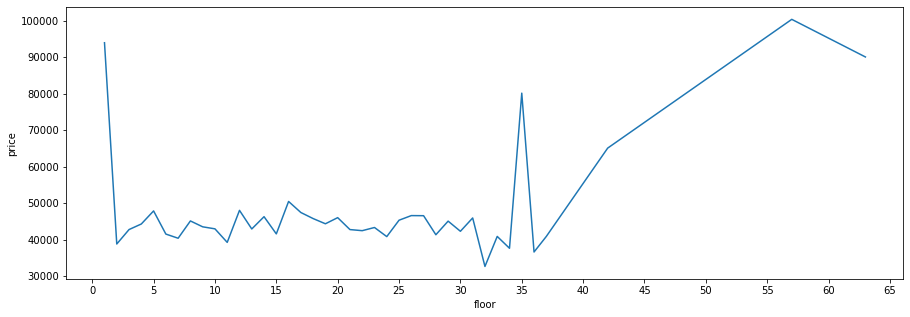

In [16]:
# 房屋单价和楼层的关系
from matplotlib import ticker
x = data["floor"].value_counts()._stat_axis.values.tolist()
x = sorted(x)
y = []
for i in x:
    y.append(data['price'][data['floor']== i].mean(0))
plt.figure(figsize=(15, 5))
plt.plot(x, y)
plt.xticks(np.arange(0, 70, step=5))
plt.xlabel("floor")
plt.ylabel("price")
# plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.show()

### 分析
由房屋单价和楼层的折线图可以看到，3-35层基本单价波动不大，35层以上的超高层和1层均价相对较高，分析超高层可能是商住楼，1层可能是四合院为主所以造成的均价过高

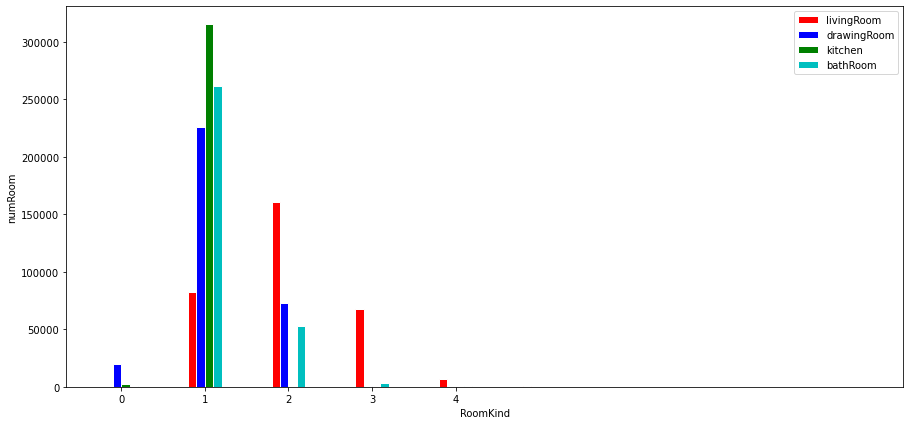

In [17]:
# 房屋自身情况分析

livingRoom = data["livingRoom"].value_counts()._stat_axis.values
drawingRoom = data["drawingRoom"].value_counts()._stat_axis.values
kitchen = data["kitchen"].value_counts()._stat_axis.values
bathRoom = data["bathRoom"].value_counts()._stat_axis.values

y_livingRoom = data["livingRoom"].value_counts()[livingRoom]
y_drawingRoom = data["drawingRoom"].value_counts()[drawingRoom]
y_kitchen = data["kitchen"].value_counts()[kitchen]
y_bathRoom = data["bathRoom"].value_counts()[bathRoom]

plt.figure(figsize = (15,7))
bar1 = plt.bar(x = livingRoom-0.15,height = y_livingRoom,width = 0.1,label = 'livingRoom',edgecolor = 'white',color = 'r')
bar2 = plt.bar(x = drawingRoom-0.05,height = y_drawingRoom,width = 0.1,label = 'drawingRoom',edgecolor = 'white',color = 'b')
bar3 = plt.bar(x = kitchen+0.05,height = y_kitchen,width = 0.1,label = 'kitchen',edgecolor = 'white',color = 'g')
bar4 = plt.bar(x = bathRoom+0.15,height = y_bathRoom,width = 0.1,label = 'bathRoom',edgecolor = 'white',color = 'c')
 
plt.xlabel('RoomKind') 
plt.ylabel('numRoom')
plt.xticks(np.arange(5))
plt.legend()

### 分析
由房屋类型分布柱状图可以看出，大部分房屋类型为2室1厅1厨1卫，1个卧室和3个卧室的房屋也相对不少，不存在没有卫生间或多个厨房的房屋

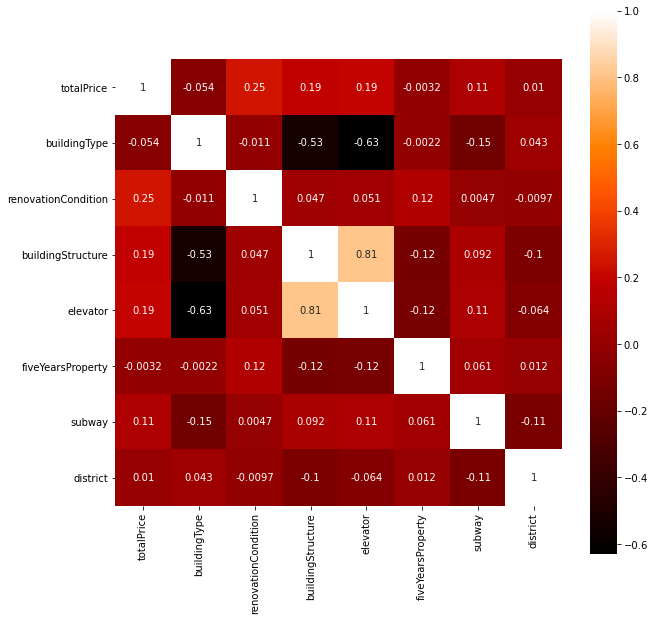

In [18]:
# 对于其他2值类等离散属性，计算它们和总价的相关关系来分析其对总价的影响
import seaborn as sns
process_col = ["totalPrice","buildingType","renovationCondition","buildingStructure","elevator","fiveYearsProperty","subway","district"]
corr = data[process_col].corr()
out = corr
plt.figure(figsize = (10,10))
sns.heatmap(out,annot=True, vmax=1, square=True,cmap='gist_heat')
plt.show()

### 分析
由相关关系热力图可知，在其余的离散属性中，renovationCondition（装修情况）、elevator（是否有电梯）、subway（是否接近地铁）和总价有较大的相关关系，其余属性buildingType（建筑结构类型）、fiveYearsProperty（房主产权是否满五年）、district（行政区划）几乎与总价无关

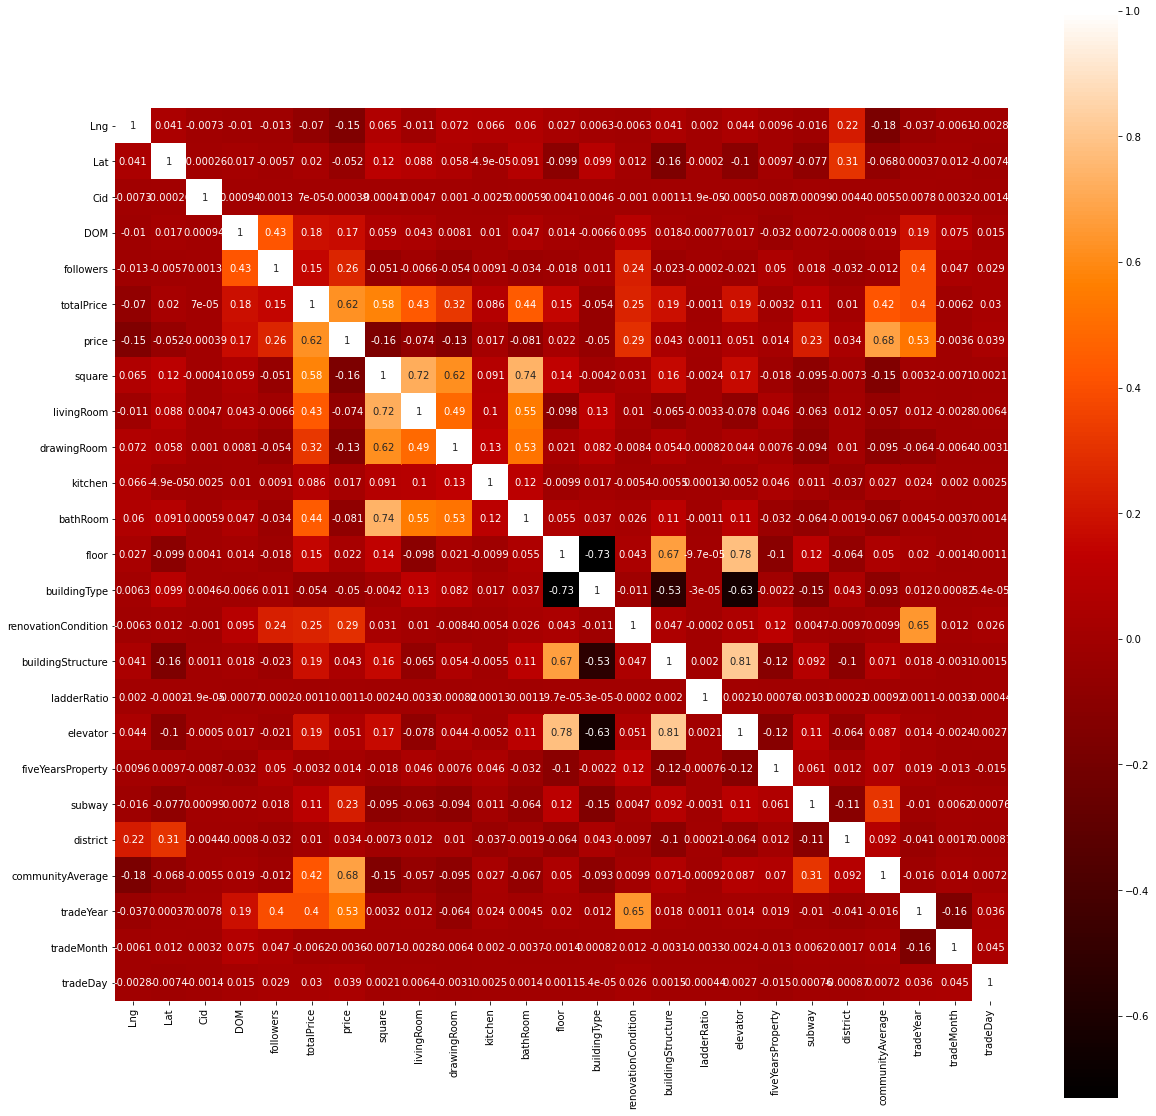

In [25]:
# 挑选合适的属性用作回归
corr = data.corr()
out = corr
plt.figure(figsize = (20,20))
sns.heatmap(out,annot=True, vmax=1, square=True,cmap='gist_heat')
plt.show()

### 分析
结合之前对相关数值属性与总价、单价之间的关系，我们认为以下属性是影响总价的相关因素：
DOM, followers, square, livingRoom, drawingRoom, kitchen, bathRoom, floor, renovationCondition, buildingStructure, elevator, subway, district, tradeYear
在后续的回归中，我们使用了上述属性进行回归预测总房价。

In [24]:
process_col=["DOM", "followers", "square", "livingRoom", "drawingRoom", "kitchen", "bathRoom", "floor", "renovationCondition", "buildingStructure", "elevator", "subway", "district", "tradeYear"]